In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read file
df = pd.read_csv("heart.csv")
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


### Attributes explanation 
* ChestPain: typical angina, atypical angina, non-anginal pain, asymptomatic
* RestBP: The person's resting blood pressure (mm Hg on admission to the hospital)
*
* AHD: Heart disease 

In [5]:
# Eliminate first column

df = df.drop(df.columns[[0]], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 33.3+ KB


In [7]:
# Removing duplicate rows if any

print('Shape before deleting duplicate values:', df.shape)

df = df.drop_duplicates()

print('Shape after deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (303, 14)
Shape after deleting duplicate values: (303, 14)


# Defining the problem statement:

Predictive model to predict heart desease
Target Variable: AHD   

## Target variable distribution

In [9]:
goal = df.AHD
counts = goal.value_counts()
percent = goal.value_counts(normalize=True)
percent100 = goal.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'AHD': counts,'percent': percent100})

,AHD,percent
AHD,,
No,164,54.1%
Yes,139,45.9%


In [10]:
# How many missing values are there for each column
df.isnull().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

### Fill null values 

In [12]:
df[df['Thal'].isna()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
87,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
266,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes


In [13]:
df.groupby(['Sex','ChestPain','Slope','Ca'])['Thal'].agg(pd.Series.mode).to_frame()

Thal
Sex ChestPain    Slope Ca                       
0   asymptomatic 1     0.0                normal
                       1.0                normal
                       2.0                normal
                 2     0.0                normal
                       1.0            reversable
                       2.0            reversable
                       3.0            reversable
                 3     2.0  [normal, reversable]
                       3.0            reversable
    nonanginal   1     0.0                normal
                       1.0                normal
                 2     0.0                normal
                       1.0                normal
                 3     0.0                normal
    nontypical   1     0.0                normal
                       1.0                normal
                       2.0                normal
                 2     0.0                normal
                       1.0                normal
    typical      1     0.0                normal
                       2.0                normal
                 3     0.0                normal
1   asymptomatic 1     0.0            reversable
                       1.0            reversable
                       2.0            reversable
                       3.0            reversable
                 2     0.0            reversable
                       1.0            reversable
                       2.0            reversable
                       3.0            reversable
                 3     0.0            reversable
                       1.0                normal
                       3.0                 fixed
    nonanginal   1     0.0                normal
                       1.0            reversable
                       2.0  [normal, reversable]
                       3.0                normal
                 2     0.0                normal
                       1.0            reversable
                       3.0            reversable
                 3     0.0                normal
                       1.0                normal
    nontypical   1     0.0                normal
                       1.0                normal
                 2     0.0                normal
                       1.0            reversable
                       3.0                 fixed
                 3     0.0  [normal, reversable]
    typical      1     0.0                normal
                       1.0                normal
                       2.0                normal
                 2     0.0            reversable
                       1.0                normal
                       2.0                normal
                 3     0.0   [fixed, reversable]

In [14]:
df.at[87, 'Thal'] = 'normal'
df.at[266, 'Thal'] = 'reversable'

In [15]:
df[df['Ca'].isna()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
166,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
192,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
287,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
302,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [16]:
df.groupby(['Sex','ChestPain','Slope','Thal'])['Ca'].agg(pd.Series.mode).to_frame()

Ca
Sex ChestPain    Slope Thal                  
0   asymptomatic 1     normal             0.0
                 2     fixed              2.0
                       normal             0.0
                       reversable         0.0
                 3     normal             2.0
                       reversable  [2.0, 3.0]
    nonanginal   1     normal             0.0
                       reversable         0.0
                 2     normal             0.0
                       reversable  [0.0, 1.0]
                 3     normal             0.0
    nontypical   1     normal             0.0
                 2     normal             0.0
    typical      1     normal             0.0
                 3     normal             0.0
1   asymptomatic 1     fixed       [0.0, 2.0]
                       normal             0.0
                       reversable         0.0
                 2     fixed              0.0
                       normal      [0.0, 1.0]
                       reversable         1.0
                 3     fixed       [0.0, 3.0]
                       normal             1.0
                       reversable         0.0
    nonanginal   1     normal             0.0
                       reversable         1.0
                 2     fixed              1.0
                       normal             0.0
                       reversable         0.0
                 3     normal             0.0
                       reversable         0.0
    nontypical   1     normal             0.0
                       reversable         0.0
                 2     fixed       [0.0, 3.0]
                       normal             0.0
                       reversable         1.0
                 3     normal             0.0
                       reversable         0.0
    typical      1     normal      [0.0, 2.0]
                       reversable         0.0
                 2     fixed              0.0
                       normal             1.0
                       reversable         0.0
                 3     fixed              0.0
                       reversable         0.0

In [17]:
df.at[166, 'Ca'] = 0.0
df.at[302, 'Ca'] = 0.0

df.at[192, 'Ca'] = 1.0
df.at[287, 'Ca'] = 1.0

In [18]:
df.nunique()

Age           41
Sex            2
ChestPain      4
RestBP        50
Chol         152
Fbs            2
RestECG        3
MaxHR         91
ExAng          2
Oldpeak       40
Slope          3
Ca             4
Thal           3
AHD            2
dtype: int64

In [19]:
numericFeatures = list(df.select_dtypes(include='number').columns)
categFeatures = list(set(df.columns) - set(numericFeatures))

# Remove goal attribute
categFeatures.remove('AHD')

print(len(numericFeatures)," Numeric Features: ",numericFeatures)
print(len(categFeatures)," Categorical Features: ",categFeatures)

11  Numeric Features:  ['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca']
2  Categorical Features:  ['ChestPain', 'Thal']


In [20]:
# Cross tablulation between two categorical variables

for predictor in categFeatures:
    print(pd.crosstab(index=df[predictor], columns=df['AHD']),'\n')

AHD           No  Yes
ChestPain            
asymptomatic  39  105
nonanginal    68   18
nontypical    41    9
typical       16    7 

AHD          No  Yes
Thal                
fixed         6   12
normal      130   37
reversable   28   90 



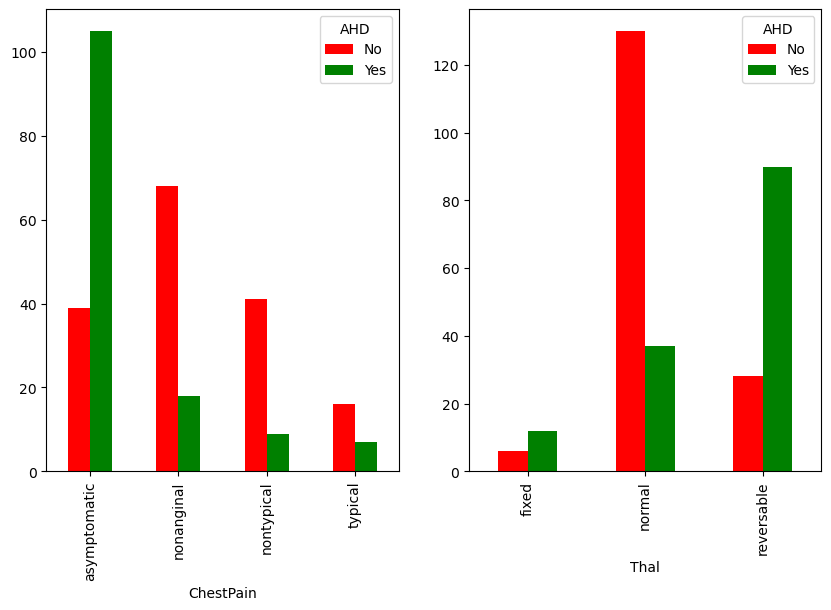

In [21]:
# Exploration: Categorical Vs Categorical -- bar charts
 
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=int(len(categFeatures)/2), ncols=2, figsize=(10,6))
 
# Creating Grouped bar plots for each categorical predictor against the Target Variable "AHD"
for CategoricalCol,i in zip(categFeatures,range(len(categFeatures))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['AHD'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])


In [22]:
numfeature=[]
for feature in numericFeatures:
    if df[feature].nunique() < 10:
        numfeature.append(feature)
        print(df.astype(str)[feature].value_counts())

Sex
1    206
0     97
Name: count, dtype: int64
Fbs
0    258
1     45
Name: count, dtype: int64
RestECG
0    151
2    148
1      4
Name: count, dtype: int64
ExAng
0    204
1     99
Name: count, dtype: int64
Slope
1    142
2    140
3     21
Name: count, dtype: int64
Ca
0.0    178
1.0     67
2.0     38
3.0     20
Name: count, dtype: int64


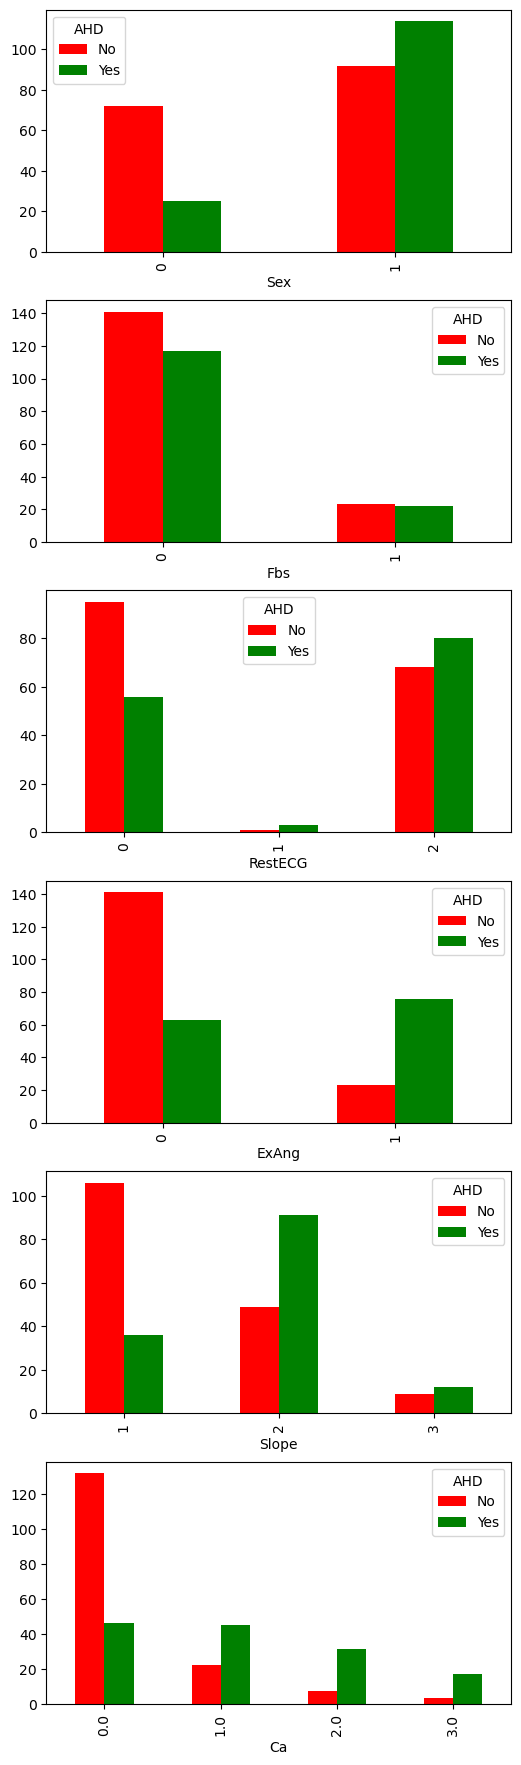

In [23]:
# Exploration: numeric Vs Categorical -- bar charts
 
import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(numfeature), ncols=1, figsize=(6,22))
 
# Creating Grouped bar plots for each categorical predictor against the Target Variable "AHD"
for numCol,i in zip(numfeature,range(len(numfeature))):
    CrossTabResult=pd.crosstab(index=df[numCol], columns=df['AHD'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])



In [24]:
selfeature = []
for feature in numericFeatures:
    if df[feature].nunique() > 10:
        selfeature.append(feature)
        
df[selfeature].describe()

,Age,RestBP,Chol,MaxHR,Oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


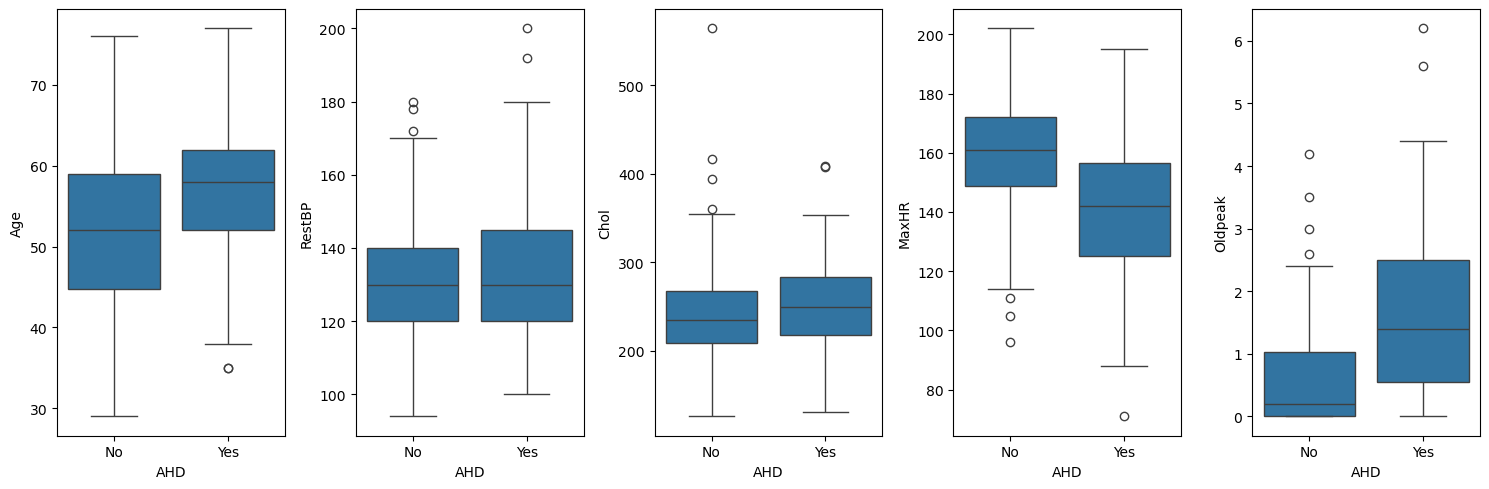

In [25]:
# Exploration: Continuous Vs Categorical -- boxplot charts
  
plt.figure(figsize=(15,5))
for i, feature in enumerate(selfeature):
    
    rows = int(len(selfeature)/5)
    
    plt.subplot(rows, 5, i+1)
    sns.boxplot(data = df, x='AHD', y =feature)

plt.tight_layout()
plt.show()

## Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [27]:
SelectedColumns = categFeatures + numericFeatures

# Selecting final columns
dfML=df[SelectedColumns]

# Adding Target Variable to the data
dfML['AHD']=df['AHD']

dfML.head()

,ChestPain,Thal,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
0,typical,fixed,63,1,145,233,1,2,150,0,2.3,3,0.0,No
1,asymptomatic,normal,67,1,160,286,0,2,108,1,1.5,2,3.0,Yes
2,asymptomatic,reversable,67,1,120,229,0,2,129,1,2.6,2,2.0,Yes
3,nonanginal,normal,37,1,130,250,0,0,187,0,3.5,3,0.0,No
4,nontypical,normal,41,0,130,204,0,2,172,0,1.4,1,0.0,No


### Converting the nominal variables to numeric using get_dummies()

In [29]:
# Treating all the nominal variables at once using dummy variables
dfML=pd.get_dummies(dfML, drop_first=True)

dfML.rename(columns = {'AHD_Yes':'AHD'}, inplace = True)

# Printing sample rows
dfML.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD
0,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
1,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
2,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
3,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
4,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False


In [30]:
def confMatrix(actual, predicted, classes):
    
    confusion_mtx = pd.DataFrame(
                    confusion_matrix(actual, predicted, labels=classes), 
                    index = classes, 
                    columns = classes)
      
    confusion_mtx = confusion_mtx.rename(columns=lambda x: '^'+x)
    
    return confusion_mtx

In [31]:
# Function to collect model metrics 

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

list_of_results = []

def classifmodel_Metrics(modelName, model, actual, predicted):
    
    classes = list(np.unique(np.concatenate((actual, predicted))))
    
    confMtx = confusion_matrix(actual, predicted)

    print("\n", modelName," Confusion matrix:\n")
    print(confMtx)
        
    #get classification report as dict:
    report = classification_report(actual, predicted, output_dict=True)
    
    #access its values  
    precision =  report['macro avg']['precision'] 
    recall = report['macro avg']['recall']    
    f1 = report['macro avg']['f1-score']
        
    res = pd.Series({'ModelName': modelName, 
                     'Model': model,
                     'accuracy' : round(accuracy_score(predicted, actual),3),
                     'precision' : round(precision,3),
                     'recall' : round(recall,3),
                     'F1' : round(f1,3)})
    
    if len(classes) == 2:
        print("\naccuracy: {0:.2%}".format(round(accuracy_score(predicted, actual),3)))
        print("precision: {0:.2%}".format(precision),", recall: {0:.2%}".format(recall),", F1: {0:.2%}".format(f1))
    
    elif len(classes) > 2:
        print('\n',classification_report(actual, predicted))
    
    return(res)

## Machine Learning

In [33]:
# train and test set stratified

listResults = []

from sklearn.model_selection import train_test_split 

X = dfML.iloc[:,:-1]         # All Features, except last
y = dfML.iloc[:,-1]          # Target - Last Column
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=145, stratify=y)
 
# Verify condition in train and test
print("Train condition distribution\n",y_train.value_counts(normalize=True))
print("Test condition distribution\n",y_test.value_counts(normalize=True))

Train condition distribution
 AHD
False    0.542453
True     0.457547
Name: proportion, dtype: float64
Test condition distribution
 AHD
False    0.538462
True     0.461538
Name: proportion, dtype: float64


### Data Scaling


In [35]:
# StandardScaler transforms data so each feature have zero-mean and unit standard-deviation

from sklearn.preprocessing import StandardScaler
 
stdScaler = StandardScaler()
stdX_train = stdScaler.fit_transform(X_train)
stdX_test = stdScaler.fit_transform(X_test)

### Logistic Regression, Decision Tree, Naive Bayes 
* Default parameters

In [37]:
# Algorithms with default parameters

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# default parameters: solver='lbfgs', C=1.0, penalty='l2'

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#default parameters: criterion='gini'

# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB
# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification

models = []
models.append(('lrm',LogisticRegression()))
models.append(('dtm',DecisionTreeClassifier()))
models.append(('nbm',GaussianNB()))

for name, model in models:
    # Creating the model on Training Data
    clf = model.fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    # Model metrics 
    results = classifmodel_Metrics(name, model, y_test, y_pred)
    listResults.append(results)


 lrm  Confusion matrix:

[[44  5]
 [ 7 35]]

accuracy: 86.80%
precision: 86.89% , recall: 86.56% , F1: 86.68%

 dtm  Confusion matrix:

[[39 10]
 [14 28]]

accuracy: 73.60%
precision: 73.63% , recall: 73.13% , F1: 73.24%

 nbm  Confusion matrix:

[[45  4]
 [ 7 35]]

accuracy: 87.90%
precision: 88.14% , recall: 87.59% , F1: 87.76%


### K-Nearest Neighbor, Support Vector Machines 
Default parameters

In [39]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier

#default parameter: n_neighbors=5

# Support Vector Machines(SVM)
from sklearn.svm import SVC

#default parameter: kernel='rbf', degree=3, gamma=scale

models = []
models.append(('knm',KNeighborsClassifier()))              
models.append(('svm',SVC()))

for name, model in models:
    # Creating the model on Training Data
    clf = model.fit(stdX_train,y_train)
    y_pred = clf.predict(stdX_test)

    # Model metrics 
    results = classifmodel_Metrics(name, model, y_test, y_pred)
    listResults.append(results)


 knm  Confusion matrix:

[[41  8]
 [10 32]]

accuracy: 80.20%
precision: 80.20% , recall: 79.93% , F1: 80.02%

 svm  Confusion matrix:

[[43  6]
 [ 8 34]]

accuracy: 84.60%
precision: 84.66% , recall: 84.35% , F1: 84.46%


In [40]:
resdf = pd.DataFrame(listResults)

#resdf.sort_values(by=['F1','recall','precision'], ascending = [False, False, False], inplace=True)
resdf.iloc[:,[0,2,3,4,5]]


,ModelName,accuracy,precision,recall,F1
0,lrm,0.868,0.869,0.866,0.867
1,dtm,0.736,0.736,0.731,0.732
2,nbm,0.879,0.881,0.876,0.878
3,knm,0.802,0.802,0.799,0.800
4,svm,0.846,0.847,0.844,0.845


## Ensembe Method: Voting Classifier

* Is an ensemble of models that are fit with the same training set, but using different algorithms
* The final prediction is obtained by majority voting

In [42]:
from sklearn.ensemble import VotingClassifier

clfs = [('lrm', resdf.iloc[0,1]), ('dtm', resdf.iloc[1,1]), ('nbm',resdf.iloc[2,1])]

vc1 = VotingClassifier(estimators=clfs)
vc1.fit(X_train,y_train)

y_pred = vc1.predict(X_test)

 # Model metrics 
results = classifmodel_Metrics('vc1', vc1, y_test, y_pred)
listResults.append(results)

#------------------------------------------------------------------
clfs = [('knn', resdf.iloc[3,1]), ('svm', resdf.iloc[4,1])]

vc2 = VotingClassifier(estimators=clfs)
vc2.fit(stdX_train,y_train)

y_pred = vc2.predict(stdX_test)

# Model metrics 
results = classifmodel_Metrics('vc2', vc2, y_test, y_pred)
listResults.append(results)


 vc1  Confusion matrix:

[[44  5]
 [ 7 35]]

accuracy: 86.80%
precision: 86.89% , recall: 86.56% , F1: 86.68%

 vc2  Confusion matrix:

[[44  5]
 [10 32]]

accuracy: 83.50%
precision: 83.98% , recall: 82.99% , F1: 83.22%


In [43]:
resdf = pd.DataFrame(listResults)

resdf.iloc[:,[0,2,3,4,5]]

,ModelName,accuracy,precision,recall,F1
0,lrm,0.868,0.869,0.866,0.867
1,dtm,0.736,0.736,0.731,0.732
2,nbm,0.879,0.881,0.876,0.878
3,knm,0.802,0.802,0.799,0.800
4,svm,0.846,0.847,0.844,0.845
5,vc1,0.868,0.869,0.866,0.867
6,vc2,0.835,0.840,0.830,0.832


### Bootstrap Aggregation (Bagging)

* The ensemble is formed by models that share the same baseline algorithm 
* Each model is fit on a different subset of the training data, yet keeping all the features
* the different training sets are generated by bostrapping taken repeated random samples with replacement

In [45]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
#default parameters: criterion='gini'

clf = DecisionTreeClassifier()

model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('dtm', model, y_test, y_pred)
listResults.append(results)


 dtm  Confusion matrix:

[[41  8]
 [27 15]]

accuracy: 61.50%
precision: 62.76% , recall: 59.69% , F1: 58.12%


In [46]:
clf.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])

### Grid Search parameter optimization: decision tree

In [48]:
clf = DecisionTreeClassifier()

# GridSearchCV
from sklearn.model_selection import GridSearchCV
  
# Parameters to try
parameter_grid={'min_samples_leaf':[0.5,1,3,5],
                'max_depth': [3,4,5,6]}
 
gridSearch = GridSearchCV(clf, parameter_grid, cv=5, n_jobs=1, verbose=5)
gridSearchResults=gridSearch.fit(X,y)

print(gridSearchResults.best_estimator_)

clf = gridSearchResults.best_estimator_
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('dt_opt', model, y_test, y_pred)
listResults.append(results)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .max_depth=3, min_samples_leaf=0.5;, score=0.541 total time=   0.0s
[CV 2/5] END .max_depth=3, min_samples_leaf=0.5;, score=0.656 total time=   0.0s
[CV 3/5] END .max_depth=3, min_samples_leaf=0.5;, score=0.590 total time=   0.0s
[CV 4/5] END .max_depth=3, min_samples_leaf=0.5;, score=0.550 total time=   0.0s
[CV 5/5] END .max_depth=3, min_samples_leaf=0.5;, score=0.533 total time=   0.0s
[CV 1/5] END ...max_depth=3, min_samples_leaf=1;, score=0.738 total time=   0.0s
[CV 2/5] END ...max_depth=3, min_samples_leaf=1;, score=0.820 total time=   0.0s
[CV 3/5] END ...max_depth=3, min_samples_leaf=1;, score=0.787 total time=   0.0s
[CV 4/5] END ...max_depth=3, min_samples_leaf=1;, score=0.783 total time=   0.0s
[CV 5/5] END ...max_depth=3, min_samples_leaf=1;, score=0.783 total time=   0.0s
[CV 1/5] END ...max_depth=3, min_samples_leaf=3;, score=0.738 total time=   0.0s
[CV 2/5] END ...max_depth=3, min_samples_leaf=3;

### Bootstrap Aggregation (Bagging)


In [55]:
from sklearn.ensemble import BaggingClassifier

clf = gridSearchResults.best_estimator_

bgc = BaggingClassifier(estimator = clf, n_estimators = 300)

model = bgc.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('bgc', model, y_test, y_pred)
listResults.append(results)

# Out-of-Bag estimation (oob_score=True)
# In bagging 67% of training instances are sampled anf the remaining 33% constitute the oob instances, 
# these can be used to estimate the performance  of the ensemble without the need of cross-validation

bgc = BaggingClassifier(estimator = clf, n_estimators = 300, oob_score=True)

model = bgc.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('bgc_otb', model, y_test, y_pred)
listResults.append(results)




 bgc  Confusion matrix:

[[40  9]
 [ 7 35]]

accuracy: 82.40%
precision: 82.33% , recall: 82.48% , F1: 82.36%

 bgc_otb  Confusion matrix:

[[40  9]
 [ 8 34]]

accuracy: 81.30%
precision: 81.20% , recall: 81.29% , F1: 81.24%


## Random Forest (Bagging of multiple Decision Trees)
Each tree is trained on a bostrapping sample with the same size of the training set, but with sqrt(p features) in case of classification and p/3 features in case of regression
The final prediction is obtained by majority voting in case of classification and average the scoring results in case of regression

In [57]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

#Random Forest  
clf = RandomForestClassifier()

model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('rf', model, y_test, y_pred)
listResults.append(results)


 rf  Confusion matrix:

[[42  7]
 [ 7 35]]

accuracy: 84.60%
precision: 84.52% , recall: 84.52% , F1: 84.52%


### Grid Search parameter optimization: Random Forest 

In [59]:
#Random Forest (Bagging of multiple Decision Trees)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
  
# Parameters to try
parameter_grid={'n_estimators':[100,200,300,500,1000],
                  'max_depth': [5,6]}
 
gridSearch = GridSearchCV(clf, parameter_grid, cv=5, n_jobs=1, verbose=5)
gridSearchResults=gridSearch.fit(X,y)

print(gridSearchResults.best_estimator_)

clf = gridSearchResults.best_estimator_
model = clf.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('rf_opt', model, y_test, y_pred)
listResults.append(results)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END .....max_depth=5, n_estimators=100;, score=0.787 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=100;, score=0.918 total time=   0.0s
[CV 3/5] END .....max_depth=5, n_estimators=100;, score=0.770 total time=   0.0s
[CV 4/5] END .....max_depth=5, n_estimators=100;, score=0.733 total time=   0.0s
[CV 5/5] END .....max_depth=5, n_estimators=100;, score=0.817 total time=   0.0s
[CV 1/5] END .....max_depth=5, n_estimators=200;, score=0.852 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=200;, score=0.902 total time=   0.1s
[CV 3/5] END .....max_depth=5, n_estimators=200;, score=0.754 total time=   0.1s
[CV 4/5] END .....max_depth=5, n_estimators=200;, score=0.717 total time=   0.1s
[CV 5/5] END .....max_depth=5, n_estimators=200;, score=0.817 total time=   0.1s
[CV 1/5] END .....max_depth=5, n_estimators=300;, score=0.836 total time=   0.1s
[CV 2/5] END .....max_depth=5, n_estimators=300;

# Boosting Methods

* Boosting refers to a family of ensemble methods in which many predictors are trained sequentially, and each predictor learns from the errors of its predecessor
* In boosting many weak learners are combined to form a stronger learner


## Adaboost

In [63]:
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier

# Choosing Decision Tree with 1 level as weak learner
dtc = DecisionTreeClassifier(max_depth=1)

adb = AdaBoostClassifier(estimator=dtc, n_estimators=100)

# Creating the model on Training Data
model = adb.fit(X_train,y_train)
y_pred = model.predict(X_test)


# Model metrics 
results = classifmodel_Metrics('adb', adb, y_test, y_pred)

listResults.append(results)


 adb  Confusion matrix:

[[40  9]
 [ 7 35]]

accuracy: 82.40%
precision: 82.33% , recall: 82.48% , F1: 82.36%


In [65]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier()

# Parameters to try
parameter_grid={'n_estimators':[30,60,90,100],
                 'learning_rate':[0.1,0.01]}
 
gridSearch = GridSearchCV(adb, parameter_grid, cv=5, n_jobs=1, verbose=5)
gridSearchResults=gridSearch.fit(X,y)

print(gridSearchResults.best_estimator_)

adb = gridSearchResults.best_estimator_
model = adb.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('adb_opt', model, y_test, y_pred)
listResults.append(results)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END learning_rate=0.1, n_estimators=30;, score=0.836 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=30;, score=0.885 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=30;, score=0.770 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=30;, score=0.733 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=30;, score=0.817 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=60;, score=0.836 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=60;, score=0.902 total time=   0.0s
[CV 3/5] END learning_rate=0.1, n_estimators=60;, score=0.787 total time=   0.0s
[CV 4/5] END learning_rate=0.1, n_estimators=60;, score=0.783 total time=   0.0s
[CV 5/5] END learning_rate=0.1, n_estimators=60;, score=0.817 total time=   0.0s
[CV 1/5] END learning_rate=0.1, n_estimators=90;, score=0.820 total time=   0.0s
[CV 2/5] END learning_rate=0.1, n_estimators=90;,

### Gradient Boosting


In [67]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=40)

# Creating the model on Training Data
model = gbc.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('gbc', gbc, y_test, y_pred)

listResults.append(results)


 gbc  Confusion matrix:

[[41  8]
 [ 9 33]]

accuracy: 81.30%
precision: 81.24% , recall: 81.12% , F1: 81.17%


In [69]:
gbc = GradientBoostingClassifier(n_estimators=40)
 
# Parameters to try
parameter_grid={'n_estimators':[30,50,80],
                'max_depth':[1,3,5],
                'learning_rate':[0.001,0.01,0.1]}
 
gridSearch = GridSearchCV(gbc, parameter_grid, cv=5, n_jobs=-1, verbose=5)
gridSearchResults=gridSearch.fit(X,y)

print(gridSearchResults.best_estimator_)

gbc = gridSearchResults.best_estimator_
model = gbc.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('gbc_opt', model, y_test, y_pred)
listResults.append(results)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GradientBoostingClassifier(max_depth=1, n_estimators=50)

 gbc_opt  Confusion matrix:

[[40  9]
 [ 7 35]]

accuracy: 82.40%
precision: 82.33% , recall: 82.48% , F1: 82.36%


### Extreme Gradient Boost (XGBoost)¶

In [71]:
import xgboost as xgb

from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier()

model = xgb.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Model metrics 
results = classifmodel_Metrics('xgb', model, y_test, y_pred)
listResults.append(results)


 xgb  Confusion matrix:

[[39 10]
 [ 9 33]]

accuracy: 79.10%
precision: 79.00% , recall: 79.08% , F1: 79.03%


In [73]:
resdf = pd.DataFrame(listResults)

resdf.sort_values(by=['F1','recall','precision'], ascending = [False, False, False], inplace=True)
resdf.iloc[:,[0,2,3,4,5]]

,ModelName,accuracy,precision,recall,F1
2,nbm,0.879,0.881,0.876,0.878
0,lrm,0.868,0.869,0.866,0.867
5,vc1,0.868,0.869,0.866,0.867
11,rf,0.846,0.845,0.845,0.845
12,rf_opt,0.846,0.845,0.845,0.845
4,svm,0.846,0.847,0.844,0.845
6,vc2,0.835,0.840,0.830,0.832
9,bgc,0.824,0.823,0.825,0.824
13,adb,0.824,0.823,0.825,0.824
16,gbc_opt,0.824,0.823,0.825,0.824


## Selection of best model: recall maximization

In [75]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Running 10-Fold Cross validation on a given algorithm
# evaluate first five best models

results = []
names=[]
# metric = 'f1_weighted'
metric = 'recall'

print("\n10-Fold Cross validation:")
for name, model in zip(resdf.iloc[0:16,0], resdf.iloc[0:16,1]):
    kfold = KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results = cross_val_score(model, X , y, cv=kfold, scoring=metric)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



10-Fold Cross validation:
nbm: 0.811685 (0.099716)
lrm: 0.810018 (0.098356)
vc1: 0.811685 (0.099716)
rf: 0.772961 (0.060610)
rf_opt: 0.765269 (0.055498)
svm: 0.409438 (0.148590)
vc2: 0.334689 (0.142926)
bgc: 0.799304 (0.071782)
adb: 0.774164 (0.092076)
gbc_opt: 0.797717 (0.070025)
bgc_otb: 0.771221 (0.061412)
adb_opt: 0.785018 (0.081064)
gbc: 0.776294 (0.104188)
knm: 0.564591 (0.116366)
xgb: 0.776545 (0.095408)
dtm: 0.706209 (0.164342)


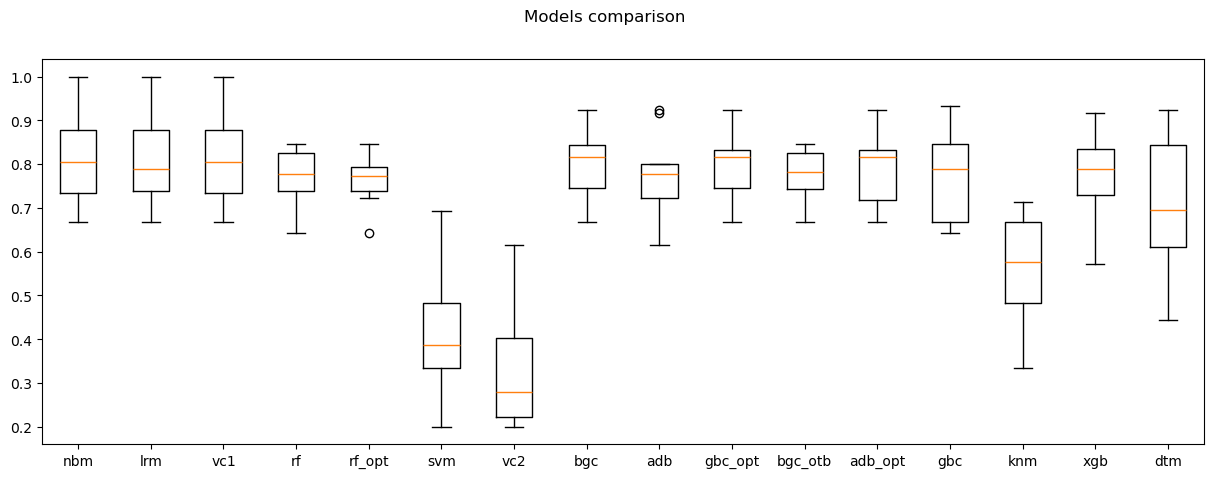

In [77]:
fig = plt.figure(figsize=(15,5))
fig.suptitle("Models comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()